## Trends in Eigenvalues

In [170]:
import os
import pandas as pd
import numpy as np
from numpy.linalg import eig, eigvalsh
import matplotlib.pyplot as plt

import eigen_analysis

#### Functions:

In [189]:
# get all itrs explored for some (dvfs, qps) pair
def list_itrs(rdtsc_dirname):
    itrs = []
    for file in os.listdir(rdtsc_dirname):
        tags = file.split('_')
        itr = tags[1]
        itrs.append(itr)
    itrs = list(set(itrs))
    return itrs

def get_merged_eigvals(dvfs, qps, itr, app, rapl='135', run='0'):
    
    app_dir = app + '_' + run + '_rapl_' + rapl + '/'
    corr_dir = app_dir + qps + '_merged_corr/'
    merged_counters_corr_dir = corr_dir + qps + '_' + dvfs + '_counters_merged_corr/'
    merged_non_counters_corr_dir = corr_dir + qps + '_' + dvfs + '_non_counters_merged_corr/'
    
    merged_counters_corr_file = merged_counters_corr_dir + dvfs + '_' + qps + '_' + itr + '_counters_merged_corr'
    merged_non_counters_corr_file = merged_non_counters_corr_dir + dvfs + '_' + qps + '_' + itr + '_non_counters_merged_corr'
    merged_eigvals = {}
    
    # all correlation matrices should be precomputed..
    # for now, bail if otherwise
    if (not os.path.exists(merged_counters_corr_file)) or (not os.path.exists(merged_non_counters_corr_file)):
        print('ERROR: Merged log correlation matrix not found or incomplete..')
        print('Aborting..')
        print()
        return merged_eigvals

    merged_counters_corr = pd.read_csv(merged_counters_corr_file, index_col=0)
    merged_non_counters_corr = pd.read_csv(merged_non_counters_corr_file, index_col=0)
    merged_counters_vals, merged_vecs = eig(merged_counters_corr)
    merged_non_counters_vals, merged_vecs = eig(merged_non_counters_corr)

    # scaling by highest eigval (usually the first val is the highest)
    for i in range(0, len(merged_counters_vals)):
        merged_counters_vals[i] = merged_counters_vals[i] / merged_counters_vals[0]    
    for i in range(0, len(merged_non_counters_vals)):
        merged_non_counters_vals[i] = merged_non_counters_vals[i] / merged_non_counters_vals[0]  

    # highest eigval is dropped
    # log of other eigvals is computed and used 
    merged_eigvals = np.concatenate([np.log(merged_counters_vals[1:4]), np.log(merged_non_counters_vals[1:4])])
    return merged_eigvals

def plot_eigvals_vs_itr(eig_itr_dict, dvfs, qps, app):
    app_dir = app + '_' + run + '_rapl_' + rapl + '/'
    
    plt.figure(figsize=(10,6))
    num_eig = len(list(eig_itr_dict.values())[0])
    eig_id_dict = {}
    for i in range(0, num_eig):
        eig_id_dict[str(i)] = []
    for itr in eig_itr_dict.keys():
        eigvals = eig_itr_dict[itr]
        for i in range(0, num_eig):
            eig_id_dict[str(i)].append(eigvals[i])
    for i in range(0, num_eig):
        plt.plot(eig_itr_dict.keys(), eig_id_dict[str(i)], 'p-', label='eig_'+str(i)) 
    
    plt.xlabel('ITR-Delay')
    plt.ylabel('log( eigval / max_eigval )')
    plt.ylim(-20)
    plt.title(f'{app}: Eigvals as ITR-Delay Changes (DVFS = {dvfs}, QPS = {qps})')
    plt.legend(title = 'eigval ID')
    plt.savefig(app_dir + 'plots/eigvals_vs_itr_'+ dvfs + '_' + qps)
    plt.show()
    
def plot_eigvals_vs_dvfs(eig_dvfs_dict, itr, qps, app):
    app_dir = app + '_' + run + '_rapl_' + rapl + '/'
    
    plt.figure(figsize=(10,6))
    num_eig = len(list(eig_dvfs_dict.values())[0])
    eig_id_dict = {}
    for i in range(0, num_eig):
        eig_id_dict[str(i)] = []
    for dvfs in eig_dvfs_dict.keys():
        eigvals = eig_dvfs_dict[dvfs]
        for i in range(0, num_eig):
            eig_id_dict[str(i)].append(eigvals[i])
    for i in range(0, num_eig):
        plt.plot(eig_dvfs_dict.keys(), eig_id_dict[str(i)], 'p-', label='eig_'+str(i)) 
    
    plt.xlabel('DVFS')
    plt.ylabel('log( eigval / max_eigval )')
    #plt.ylim(-20)
    plt.title(f'{app}: Eigvals as DVFS Changes (ITR-Delay = {itr}, QPS = {qps})')
    plt.legend(title = 'eigval ID')
    plt.savefig(app_dir + 'plots/eigvals_vs_dvfs_'+ itr + '_' + qps)
    plt.show()

### As ITR-delay changes, how do eigenvalues behave?
#### (const DVFS, const QPS = 200k)

In [183]:
app = 'mcd'
run = '0'
rapl = '135'
#dvfs = '0x1300'
qps = '75k'
app_dir = app + '_' + run + '_rapl_' + rapl + '/'

dvfs_list = []
if app == 'mcd':
    dvfs_list = ['0xd00', '0xf00', '0x1100', '0x1300', '0x1500', '0x1700', '0x1900', '0x1b00', '0x1d00']


In [184]:
print(app_dir)
print(f'itrs: {itrs}')
print(f'dvfs_list: {dvfs_list}')

mcd_0_rapl_135/
itrs: ['2', '10', '20', '30', '40', '50', '100', '200', '250', '300', '350', '400']
dvfs_list: ['0xd00', '0xf00', '0x1100', '0x1300', '0x1500', '0x1700', '0x1900', '0x1b00', '0x1d00']


DVFS: 0xd00
itrs: ['2', '4', '10', '20', '30', '40', '50', '100', '200', '300', '400']


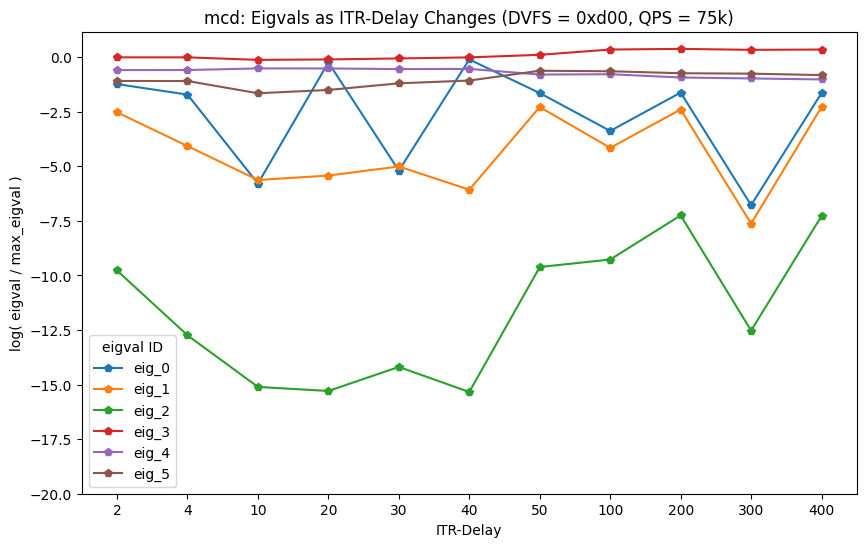

DVFS: 0xf00
itrs: ['2', '4', '10', '20', '30', '40', '50', '100', '200', '300', '400']


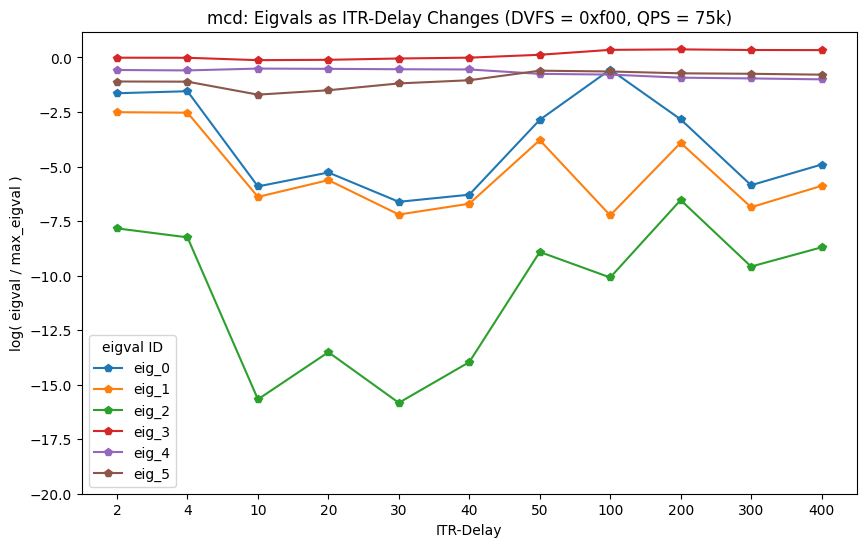

DVFS: 0x1100
itrs: ['2', '4', '10', '20', '30', '40', '50', '100', '200', '300', '400']


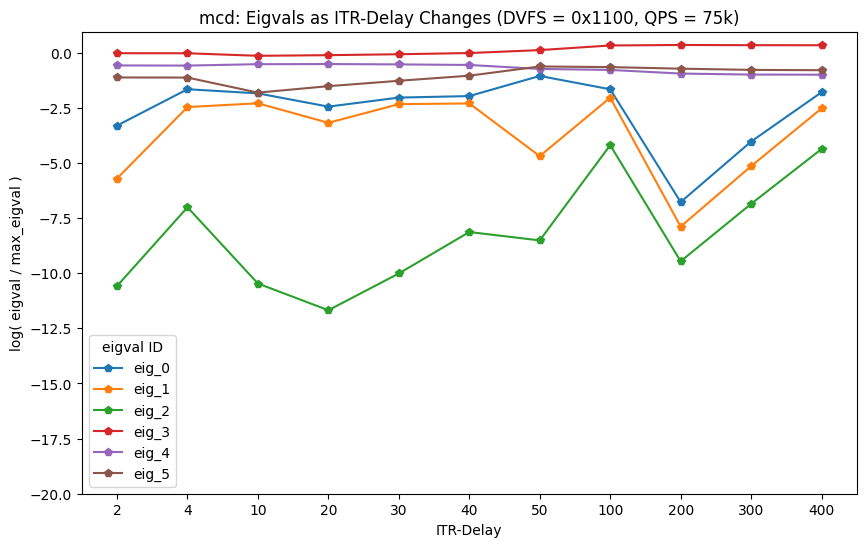

DVFS: 0x1300
itrs: ['2', '4', '10', '20', '30', '40', '50', '100', '200', '300', '400']


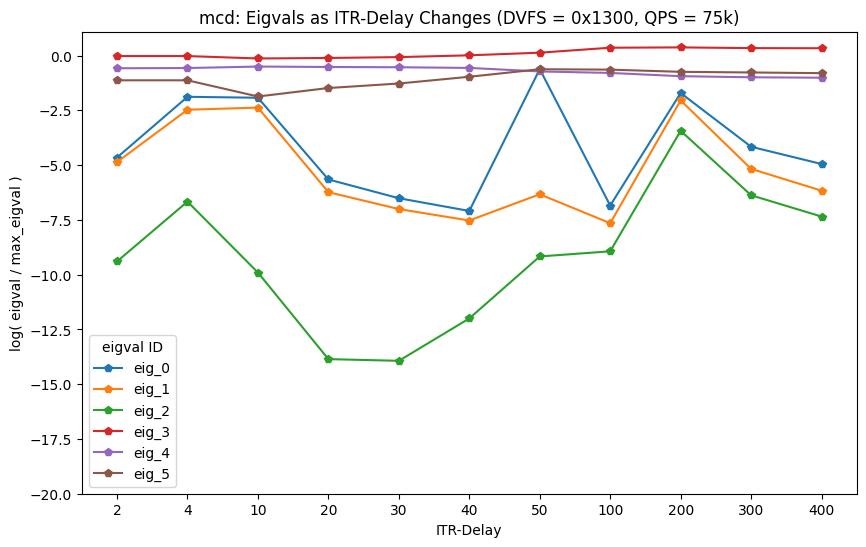

DVFS: 0x1500
itrs: ['2', '4', '10', '20', '30', '40', '50', '100', '200', '300', '400']


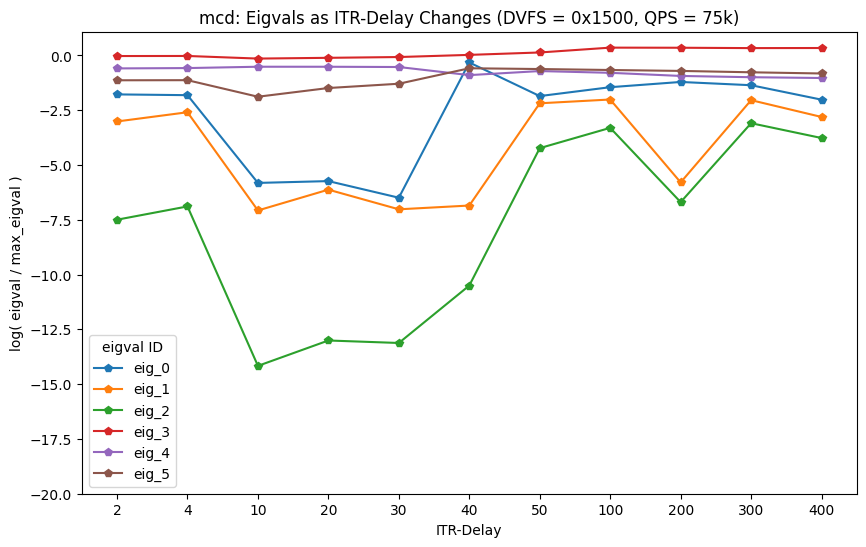

DVFS: 0x1700
itrs: ['2', '4']


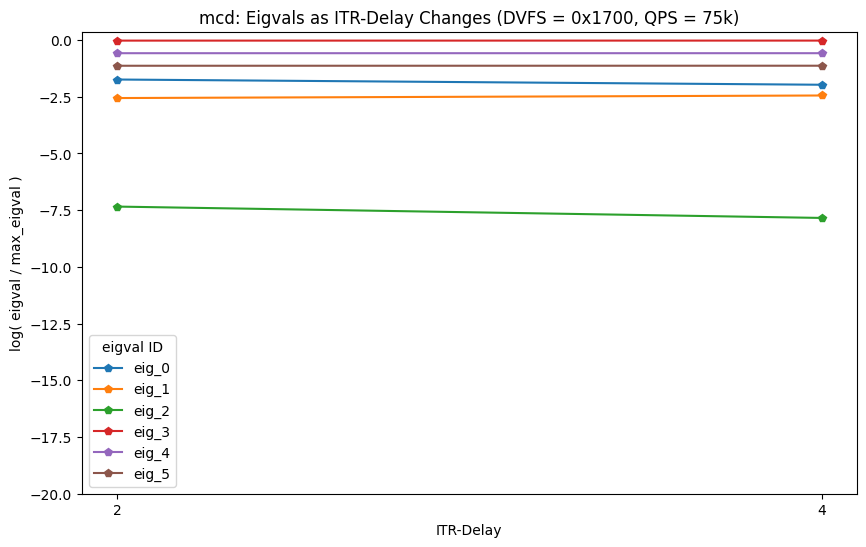

DVFS: 0x1900
itrs: ['2', '4', '10', '20', '30', '40', '50', '100', '200', '300', '400']


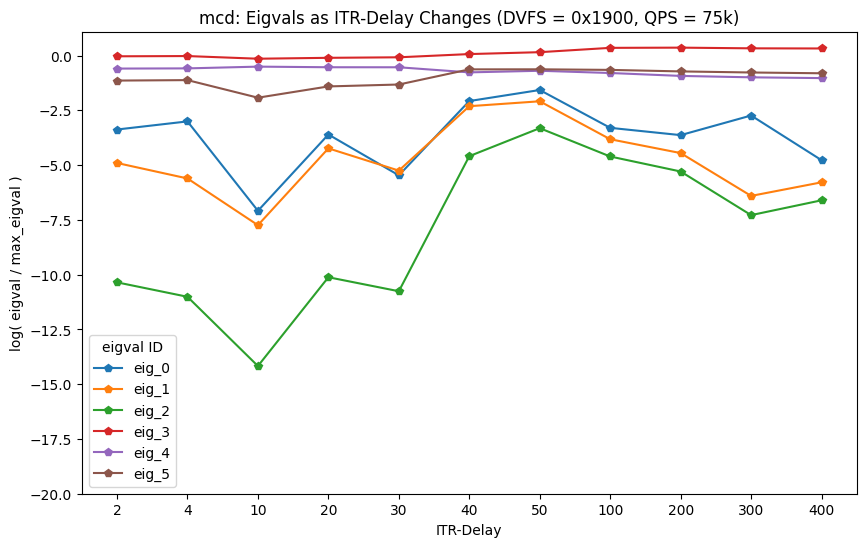

DVFS: 0x1b00
itrs: ['2', '4', '10', '20', '30', '40', '50', '100', '200', '300', '400']


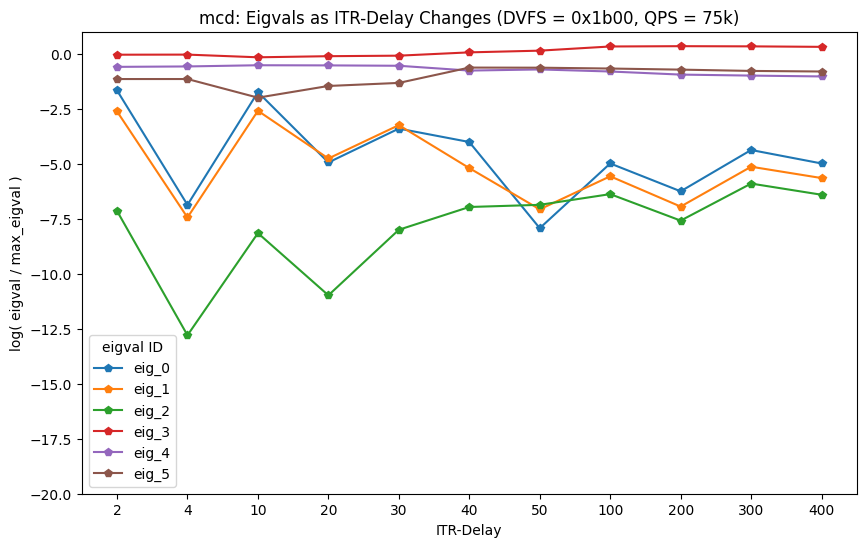

DVFS: 0x1d00
itrs: ['2', '4', '10', '20', '30', '40', '50', '100', '200', '300', '400']


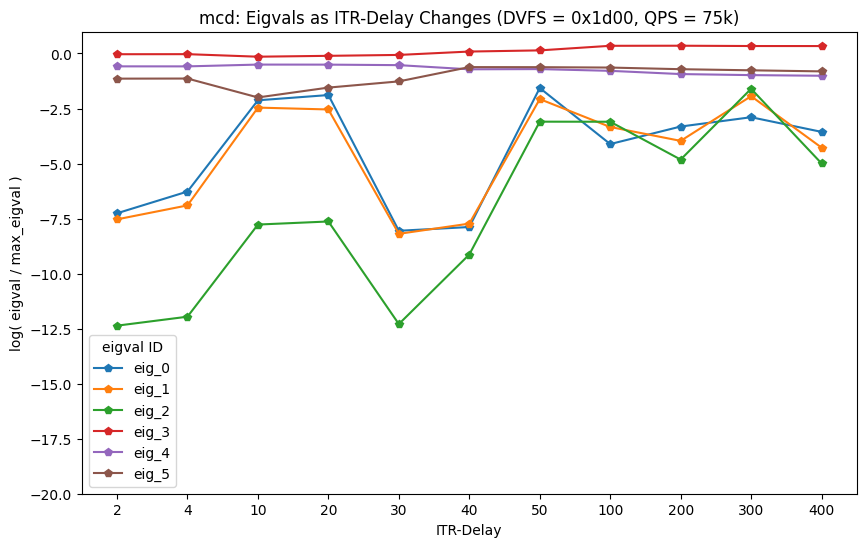

In [190]:
for dvfs in dvfs_list:
    rdtsc_dir = app_dir + qps + '_qps/linux_' + app + '_rdtsc_' + run + '_' + dvfs + '_' + rapl + '_' + qps +'/'
    itrs = list_itrs(rdtsc_dir)
    tmp_itrs = [int(i) for i in itrs]
    tmp_itrs = np.sort(tmp_itrs)
    itrs = [str(i) for i in tmp_itrs]

    print(f'DVFS: {dvfs}')
    print(f'itrs: {itrs}')

    eig_itr_dict = {}
    for itr in itrs:
        if (itr == '10') and (dvfs == '0xd00') and (qps == '200k'):
            continue
        eigvals = get_merged_eigvals(dvfs, qps, itr, app, rapl='135', run='0')
        eig_itr_dict[itr] = eigvals

    plot_eigvals_vs_itr(eig_itr_dict, dvfs, qps, app)


itr: 2
dvfs_list: ['0xd00', '0xf00', '0x1100', '0x1300', '0x1500', '0x1700', '0x1900', '0x1b00', '0x1d00']


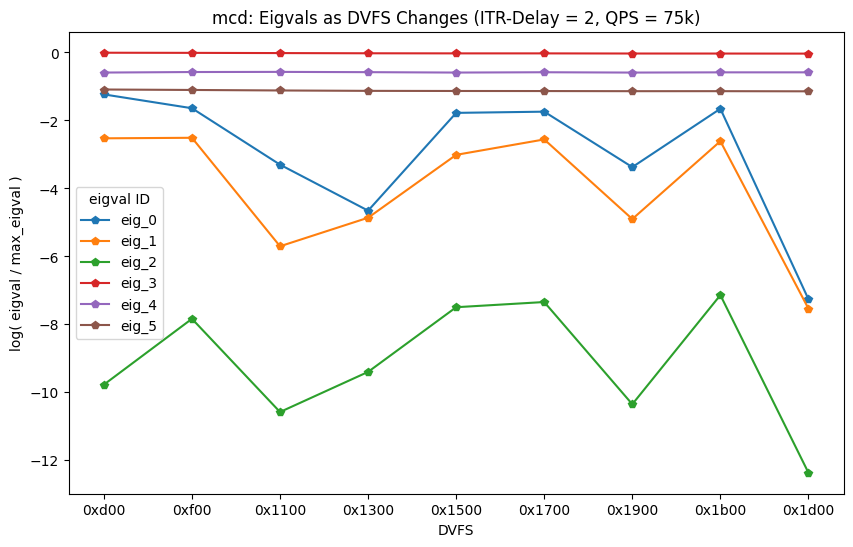

itr: 4
dvfs_list: ['0xd00', '0xf00', '0x1100', '0x1300', '0x1500', '0x1700', '0x1900', '0x1b00', '0x1d00']


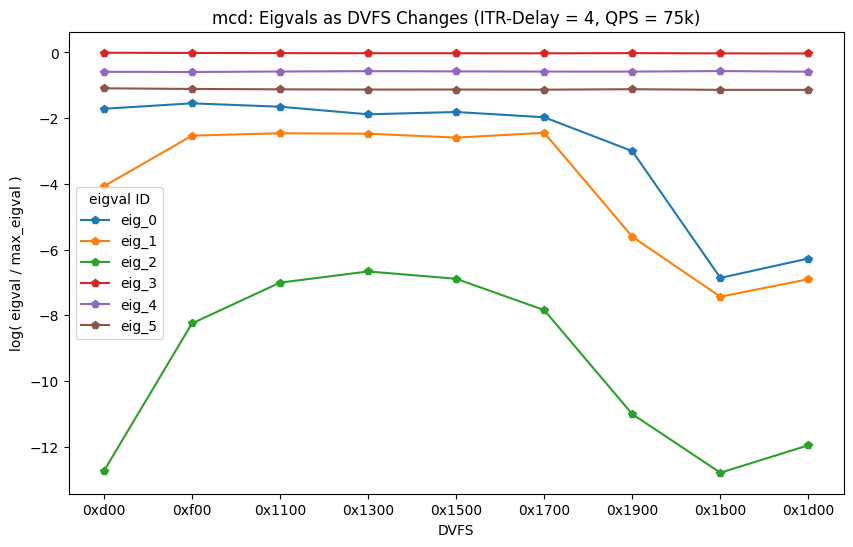

itr: 10
dvfs_list: ['0xd00', '0xf00', '0x1100', '0x1300', '0x1500', '0x1700', '0x1900', '0x1b00', '0x1d00']
ERROR: Merged log correlation matrix not found or incomplete..
Aborting..



KeyError: 0

<Figure size 1000x600 with 0 Axes>

In [187]:
dvfs = dvfs_list[0]

rdtsc_dir = app_dir + qps + '_qps/linux_' + app + '_rdtsc_' + run + '_' + dvfs + '_' + rapl + '_' + qps +'/'
itrs = list_itrs(rdtsc_dir)
tmp_itrs = [int(i) for i in itrs]
tmp_itrs = np.sort(tmp_itrs)
itrs = [str(i) for i in tmp_itrs]

for itr in itrs:    
    print(f'itr: {itr}')
    print(f'dvfs_list: {dvfs_list}')

    eig_dvfs_dict = {}
    for dvfs in dvfs_list:
        if (itr == '10') and (dvfs == '0xd00') and (qps == '200k'):
            continue
        eigvals = get_merged_eigvals(dvfs, qps, itr, app, rapl='135', run='0')
        eig_dvfs_dict[dvfs] = eigvals

    plot_eigvals_vs_dvfs(eig_dvfs_dict, itr, qps, app)